In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#loading the data from csv file to pandas data fraame 
car_data = pd.read_csv("car data.csv")

In [3]:
#check the 5 rows of data set 
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#cheking the shape of data set 
car_data.shape

(301, 9)

In [5]:
#getting some info about the data set 
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
#this data has no null value there is showing the non null means no null value in data 

In [6]:
#cheking is any null calue 
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#cheking the distribution of categorical data 
print(car_data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [8]:
print(car_data.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [9]:
print(car_data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
#encoding the categorical data 
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [12]:
#encoding the categorical data 
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [13]:
#encoding the categorical data 
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [17]:
#splitting the data and target  
x = car_data.drop(['Car_Name','Selling_Price'],axis=1)
y = car_data['Selling_Price']

In [20]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [21]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [22]:
#splitting data into train and test 
# 0.1 mean the 10% of the data 
x_train , x_test,y_train,y_test = train_test_split(x ,y , test_size=0.1,random_state=2)

In [23]:
#mode training 
#1. linear regression 
lin_reg_model  = LinearRegression() 

In [24]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [25]:
#model evaluation 
training_data_predi  = lin_reg_model.predict(x_train)

In [27]:
error_score = metrics.r2_score(y_train,training_data_predi)
print("r square error :",error_score)

r square error : 0.8799451660493708


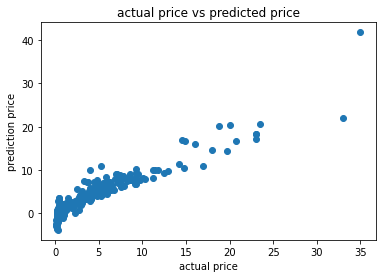

In [28]:
#visulize the actual price and predicted prices 
plt.scatter(y_train,training_data_predi)
plt.xlabel("actual price")
plt.ylabel("prediction price")
plt.title("actual price vs predicted price")
plt.show()

In [29]:
test_data_predi  = lin_reg_model.predict(x_test)
error_score_test = metrics.r2_score(y_test,test_data_predi)
print("r square error :",error_score_test)

r square error : 0.8365766715026374


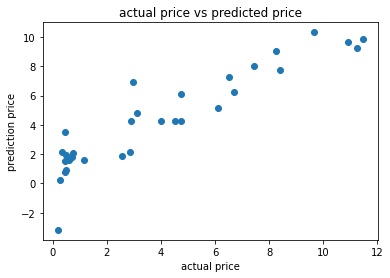

In [30]:
#visulize the actual price and predicted prices 
plt.scatter(y_test,test_data_predi)
plt.xlabel("actual price")
plt.ylabel("prediction price")
plt.title("actual price vs predicted price")
plt.show()

r square error : 0.8427856123435794


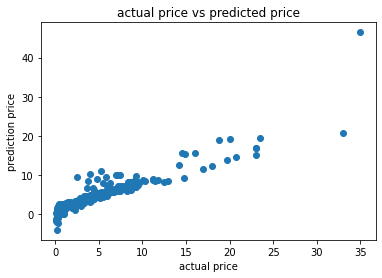

r square error : 0.8709167941173195


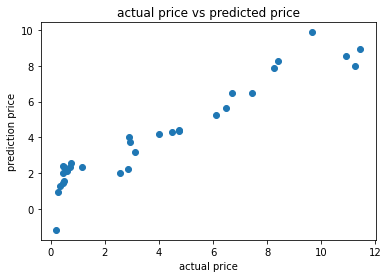

In [31]:
#compare linear with lasso 
#1. lasso reggression 
lasso_reg_model  = Lasso() 

lasso_reg_model.fit(x_train,y_train)

#model evaluation 
training_data_predi  = lasso_reg_model.predict(x_train)

error_score = metrics.r2_score(y_train,training_data_predi)
print("r square error :",error_score)

#visulize the actual price and predicted prices 
plt.scatter(y_train,training_data_predi)
plt.xlabel("actual price")
plt.ylabel("prediction price")
plt.title("actual price vs predicted price")
plt.show()

test_data_predi  = lasso_reg_model.predict(x_test)
error_score_test = metrics.r2_score(y_test,test_data_predi)
print("r square error :",error_score_test)

#visulize the actual price and predicted prices 
plt.scatter(y_test,test_data_predi)
plt.xlabel("actual price")
plt.ylabel("prediction price")
plt.title("actual price vs predicted price")

plt.show()